**IMPORT** **LIBRARIES**

In [7]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import pandas as pd
import numpy as np
# Importing  tools for visualization
import matplotlib.pylab as plt
import seaborn as sns
# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder
# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


**DATASET** **LOADING**

In [8]:
#loading dataset
df = pd.read_csv("https://raw.githubusercontent.com/Sid1018/IRIS-FLOWER-CLASSIFICATION/main/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Dataset Rows & Columns count**

In [9]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  6


**Dataset Information**

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Duplicate Values**

In [11]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')


number of duplicated rows are 0


Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [13]:
# Dataset Columns
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [14]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.50,5.84,3.05,3.76,1.20,NaN
std,43.45,0.83,0.43,1.76,0.76,NaN
min,1.00,4.30,2.00,1.00,0.10,NaN
25%,38.25,5.10,2.80,1.60,0.30,NaN
50%,75.50,5.80,3.00,4.35,1.30,NaN
75%,112.75,6.40,3.30,5.10,1.80,NaN


In [15]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Id is 150
No. of unique values in SepalLengthCm is 35
No. of unique values in SepalWidthCm is 23
No. of unique values in PetalLengthCm is 43
No. of unique values in PetalWidthCm is 22
No. of unique values in Species is 3


In [16]:
# We don't need the 1st column so let's drop that
data=df.iloc[:,1:]


In [17]:
# New updated dataset
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


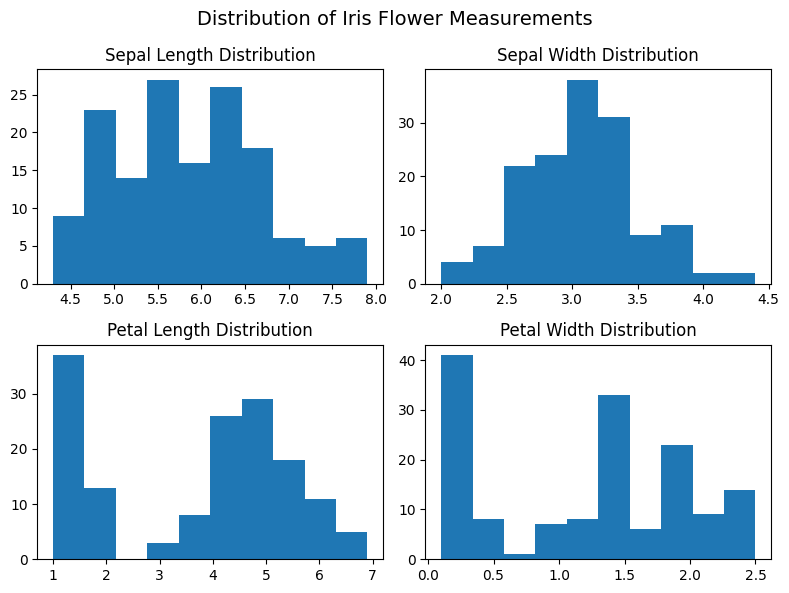

In [18]:
# Chart - 1 Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(data['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(data['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(data['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(data['PetalWidthCm'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()

In [19]:
# Define colors for each species and the corresponding species labels.
colors = ['blue', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

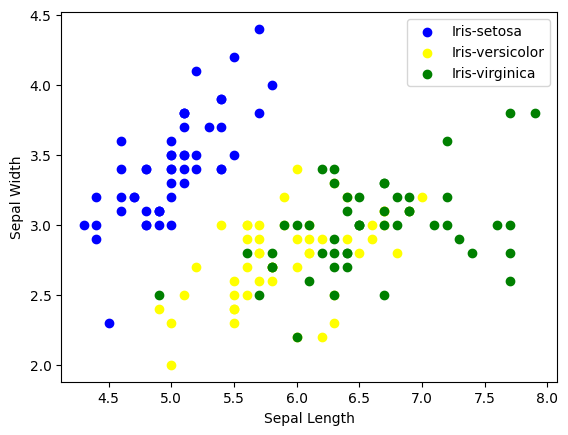

In [20]:
# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.
# Create a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

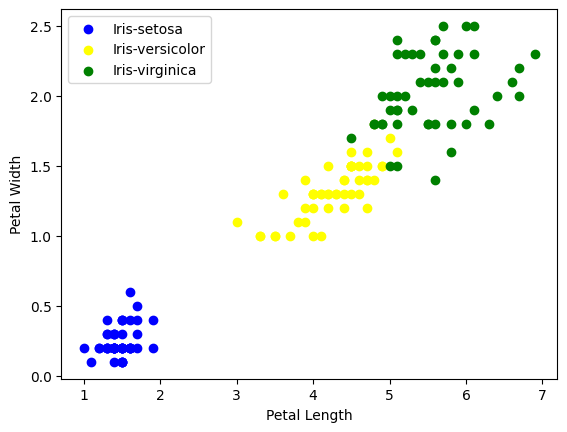

In [21]:
# Chart - 3 Scatter plot visualization code for Petal Length vs Petal Width.
# Create a scatter plot for Petal Length vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()



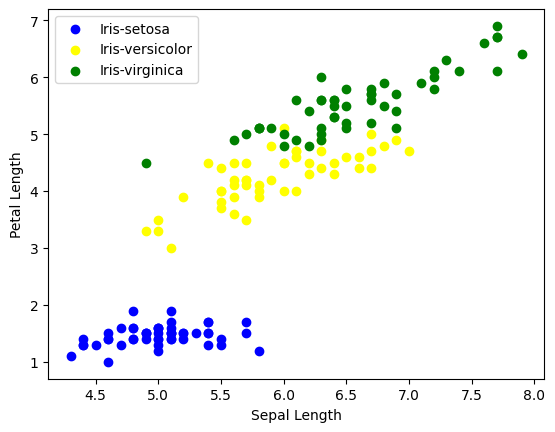

In [22]:
# Chart - 4 Scatter plot visualization code for Sepal Length vs Petal Length.
# Create a scatter plot for Sepal Length vs Petal Length for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()